# Heart Disease Prediction

The major challenge in heart disease is its detection.Early prediction and its control can be helpful to prevent adn detect and decrease the death rates due to heart diseases.Even though heart diseases can occur in different forms, there are some common set of risk factors that influence whether one will be at the risk of getting heart disease.

Since we have good amount of data available, we can make use of various machine learning algorithms to analyse the data for hidden patterns. These hidden patterns can be used for health diagnosis.

The working of the system starts with the collection of data and selecting the
important attributes. Then the required data is preprocessed into the required format.
The data is then divided into two parts training and testing data. The algorithms are
applied and the model is trained using the training data. The accuracy of the system is
obtained by testing the system using the testing data. This system is implemented
using the following modules.
>1.) Collection of Dataset
2.) Selection of attributes
3.) Data Pre-Processing
4.) Balancing of Data
5.) Disease Prediction

1. Age
2. Sex
3. Type of Chest Pain
4. Level of Blood Pressure
5. Cholestrol
6. Blood Sugar Level
7. ECG Result
8. Maximum Heart Rate
9. Excercise Angina
10. Oldpeak
11. ST slope
12. Heart Disease(target Variable)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

In [3]:
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#spltting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [167]:
#model validation
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

In [168]:
df = pd.read_csv('heart_disease_final.csv')

In [7]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
#changing the column names as they are not
#having easy to understand names.
df.columns = ['Age','Sex','Chest_pain_type','Resting_blood_pressure','Cholestrol',
              'Fasting_blood_pressure','Rest_ECG','Maximum_hear_rate',
              'Excercise_induced_angina','ST_Depression','ST_slope','Heart_Disease']

In [9]:
df.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Cholestrol,Fasting_blood_pressure,Rest_ECG,Maximum_hear_rate,Excercise_induced_angina,ST_Depression,ST_slope,Heart_Disease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Converting some columns into categorical features

In [10]:
#chest_pain_type
# 1. typical angina
# 2. atypical angina
# 3. non-anginal pain
# 4. asymptomatic

df['Chest_pain_type'][df['Chest_pain_type'] == 1] = 'typical angina'
df['Chest_pain_type'][df['Chest_pain_type'] == 2] = 'atypical angina'
df['Chest_pain_type'][df['Chest_pain_type'] == 3] = 'non-anginal pain'
df['Chest_pain_type'][df['Chest_pain_type'] == 4] = 'asymptomatic'


In [11]:
df['Chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: Chest_pain_type, dtype: int64

In [12]:
#Rest_ECG
df['Rest_ECG'][df['Rest_ECG']==0]='normal'
df['Rest_ECG'][df['Rest_ECG']==1]='ST-T wave abnormality'
df['Rest_ECG'][df['Rest_ECG']==2]='left ventricular hypertrophy'

In [13]:
df['Rest_ECG'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: Rest_ECG, dtype: int64

In [14]:
#ST slope
df['ST_slope'][df['ST_slope']==1]='upslopping'
df['ST_slope'][df['ST_slope']==2]='flat'
df['ST_slope'][df['ST_slope']==3]='downsloping'

In [15]:
df['ST_slope'].value_counts()

flat           582
upslopping     526
downsloping     81
0                1
Name: ST_slope, dtype: int64

In [16]:
df['ST_slope'][df['ST_slope']==0]='flat'

In [17]:
df['ST_slope'].value_counts()

flat           583
upslopping     526
downsloping     81
Name: ST_slope, dtype: int64

In [18]:
df['Sex'][df['Sex']==0]='Female'
df['Sex'][df['Sex']==1]='Male'

In [19]:
df['Sex'].value_counts()

Male      909
Female    281
Name: Sex, dtype: int64

#### Checking for missing values

In [20]:
df.isna().sum()

Age                         0
Sex                         0
Chest_pain_type             0
Resting_blood_pressure      0
Cholestrol                  0
Fasting_blood_pressure      0
Rest_ECG                    0
Maximum_hear_rate           0
Excercise_induced_angina    0
ST_Depression               0
ST_slope                    0
Heart_Disease               0
dtype: int64

In [21]:
#so there are no missing values

## Exploratory Data Analysis(EDA)

In [22]:
df.shape

(1190, 12)

In [23]:
#Summary of Numerical Columns
df.describe(include = np.number)

,Age,Resting_blood_pressure,Cholestrol,Fasting_blood_pressure,Maximum_hear_rate,Excercise_induced_angina,ST_Depression,Heart_Disease
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [24]:
df.describe(include = np.object)

,Sex,Chest_pain_type,Rest_ECG,ST_slope
count,1190,1190,1190,1190
unique,2,4,3,3
top,Male,asymptomatic,normal,flat
freq,909,625,684,583


In [25]:
#distribution of heart disease for this particular data

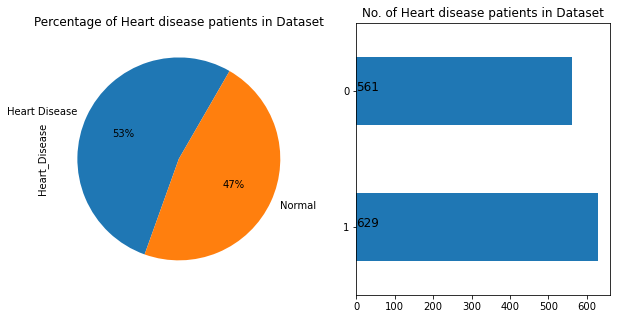

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))

ax1 = df['Heart_Disease'].value_counts().plot.pie( x="Heart Disease" ,y ='No.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["Heart_Disease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["Heart_Disease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

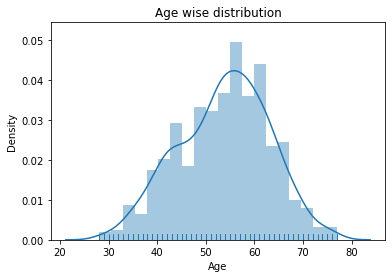

In [27]:
#age wise distribution
ax= sns.distplot(df['Age'], rug=True)
plt.title("Age wise distribution")
plt.show()

Text(0.5, 1.0, 'Distribution of Gender')

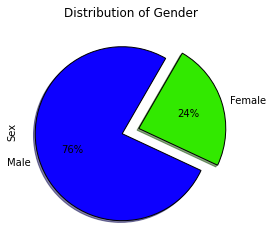

In [28]:
#Gender Distribution
df["Sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":1,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")

In [29]:
#this shows that males are having more heart diseaes than female

In [30]:
# to analyse in more detail i will separate the normal
# and heart disease patients

In [31]:
attr_1 = df[df['Heart_Disease']==1]
attr_0 = df[df['Heart_Disease']==0]

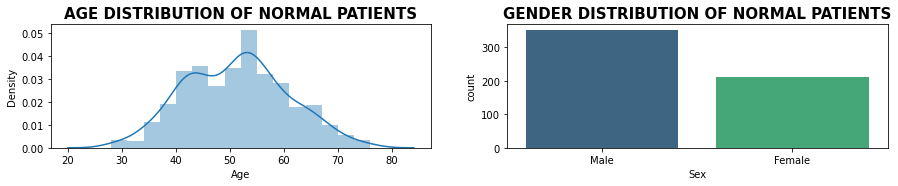

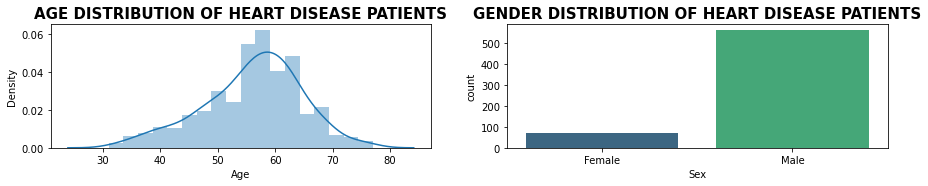

In [32]:

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr_0['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr_1['Sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [33]:
#distribution of chest pain type

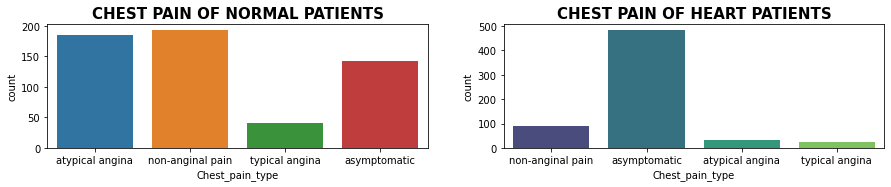

In [34]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(attr_0['Chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr_1['Chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [35]:
pd.crosstab(df['Chest_pain_type'],df['Heart_Disease'],normalize='columns')*100


Heart_Disease,0,1
Chest_pain_type,,
asymptomatic,25.311943,76.788553
atypical angina,32.976827,4.928458
non-anginal pain,34.402852,14.308426
typical angina,7.308378,3.974563


76% of the people having heart disease have asymtpmatic pain in the chest.

In [36]:
#distribution of Rest ECG

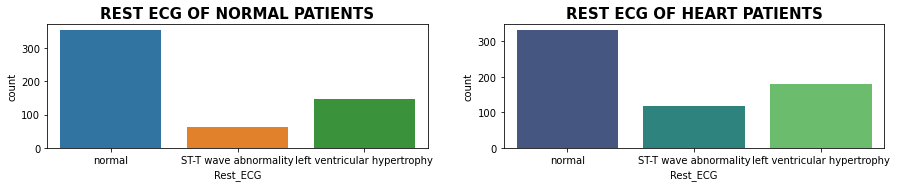

In [37]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(attr_0['Rest_ECG'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr_1['Rest_ECG'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [38]:
pd.crosstab(df['Rest_ECG'], df['Heart_Disease'], normalize='columns') * 100

Heart_Disease,0,1
Rest_ECG,,
ST-T wave abnormality,11.051693,18.918919
left ventricular hypertrophy,26.024955,28.457870
normal,62.923351,52.623211


![](https://i.ibb.co/R3V4tWC/heart1.png)

In [39]:
#so we realize that 52% of the heart disease patients have
#normal ECG

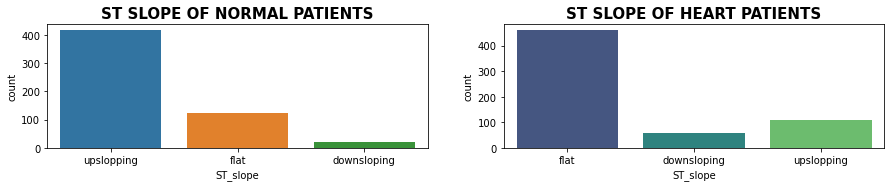

In [40]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(attr_0['ST_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr_1['ST_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [42]:
pd.crosstab(df['ST_slope'],df['Heart_Disease'],normalize ='columns')*100

Heart_Disease,0,1
ST_slope,,
downsloping,3.921569,9.379968
flat,21.925134,73.131955
upslopping,74.153298,17.488076


73% of the people having heart disease have flat ST slope

### Distribution of Numerical Variables 

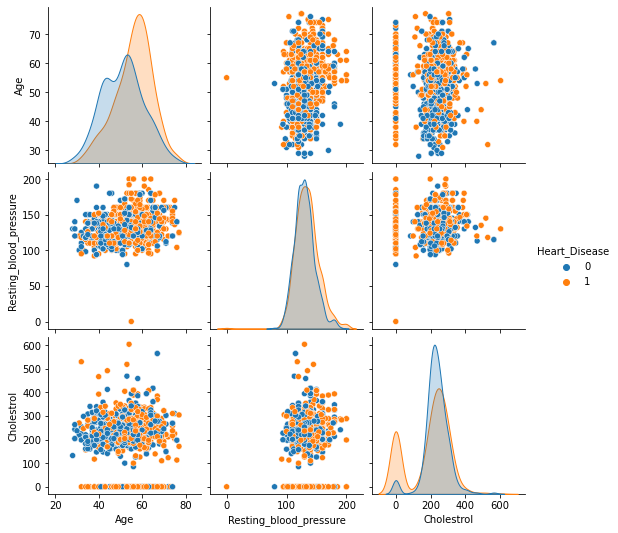

In [43]:
sns.pairplot(df,hue='Heart_Disease',vars=['Age','Resting_blood_pressure','Cholestrol'])

<AxesSubplot:xlabel='Resting_blood_pressure', ylabel='Age'>

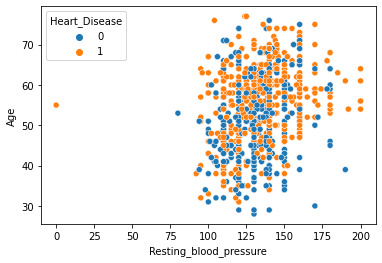

In [46]:
sns.scatterplot(x = 'Resting_blood_pressure', y = 'Age', hue = 'Heart_Disease', data = df)

In [47]:
#one outlier is there

<AxesSubplot:xlabel='Cholestrol', ylabel='Age'>

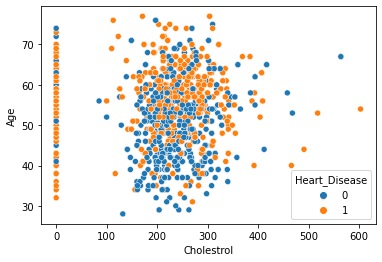

In [48]:
sns.scatterplot(x = 'Cholestrol', y = 'Age', hue = 'Heart_Disease', data = df)

<AxesSubplot:xlabel='Resting_blood_pressure', ylabel='Cholestrol'>

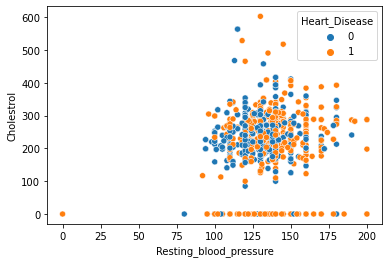

In [49]:
sns.scatterplot(x = 'Resting_blood_pressure', y = 'Cholestrol', hue = 'Heart_Disease', data = df)

In [50]:
#since cholestrol has direct blood pressure. 
#so high blood pressure with zero cholestrol not possible

In [55]:
numerical_features = df[['Age','Resting_blood_pressure','Cholestrol','Maximum_hear_rate']]

In [58]:
numerical_features.head()

,Age,Resting_blood_pressure,Cholestrol,Maximum_hear_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [60]:
from scipy import stats
#calculating the z score for the detection of outliers
z=np.abs(stats.zscore(numerical_features))
print(z)

           Age  Resting_blood_pressure  Cholestrol  Maximum_hear_rate
0     1.466728                0.427328    0.775674           1.265039
1     0.504600                1.516587    0.299512           0.637758
2     1.787437                0.117301    0.716489           1.636136
3     0.611503                0.318402    0.035867           1.244085
4     0.029915                0.971958    0.151550           0.695214
...        ...                     ...         ...                ...
1185  0.932213                1.206560    0.529071           0.303164
1186  1.526558                0.645180    0.171279           0.049682
1187  0.350624                0.117301    0.782852           0.969650
1188  0.350624                0.117301    0.252877           1.343449
1189  1.680534                0.318402    0.348832           1.304244

[1190 rows x 4 columns]


In [63]:
#flitering outliers
print(np.where(z>3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  593,
        618,  734,  761, 1013, 1039, 1075], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [64]:
# so we have 18 outliers found

In [65]:
df = df[(z<3).all(axis=1)]

In [66]:
df

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Cholestrol,Fasting_blood_pressure,Rest_ECG,Maximum_hear_rate,Excercise_induced_angina,ST_Depression,ST_slope,Heart_Disease
0,40,Male,atypical angina,140,289,0,normal,172,0,0.0,upslopping,0
1,49,Female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,Male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upslopping,0
3,48,Female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,Male,non-anginal pain,150,195,0,normal,122,0,0.0,upslopping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,Male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,Male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,Male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,Female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [67]:
#encoding categorical features
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Resting_blood_pressure,Cholestrol,Fasting_blood_pressure,Maximum_hear_rate,Excercise_induced_angina,ST_Depression,Heart_Disease,Sex_Male,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,Rest_ECG_left ventricular hypertrophy,Rest_ECG_normal,ST_slope_flat,ST_slope_upslopping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [69]:
df.shape

(1173, 16)

In [70]:
#separaring dependent and independent variables
X = df.drop(['Heart_Disease'],axis=1)
y = df['Heart_Disease']

<AxesSubplot:title={'center':'Correlation with Dependent Variable'}>

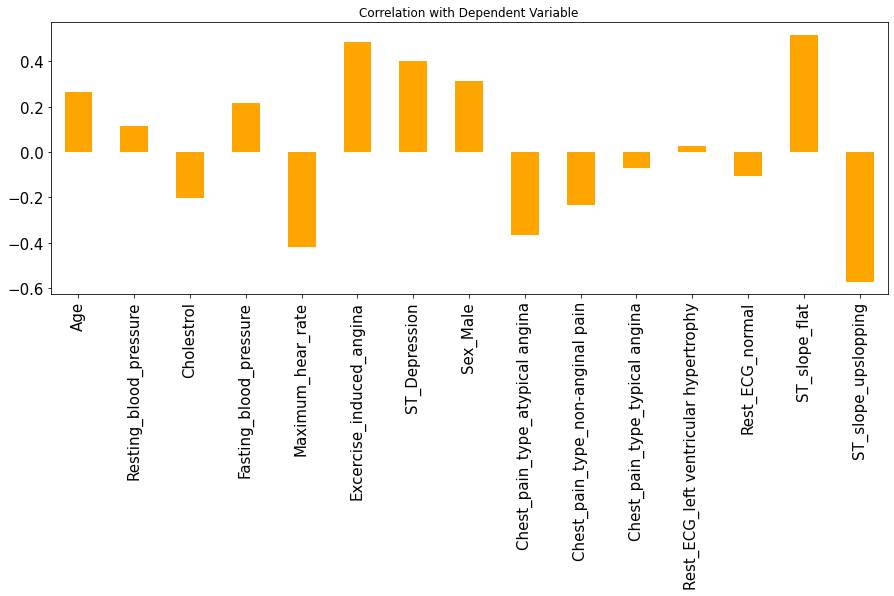

In [74]:
X.corrwith(y).plot.bar(figsize=(15,5),title = 'Correlation with Dependent Variable',fontsize=15,
                      rot = 90,color='orange')

### Splitting the dataset 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [95]:
print(X_train.shape)
print(y_train.shape)

(938, 15)
(938,)


In [96]:
print(X_test.shape)
print(y_test.shape)

(235, 15)
(235,)


In [97]:
#normalizing the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
X_train[['Age','Resting_blood_pressure','Cholestrol','Maximum_hear_rate',
         'ST_Depression']]=scaler.fit_transform(X_train[['Age',
                                                        'Resting_blood_pressure','Cholestrol','Maximum_hear_rate',
                                                        'ST_Depression']])
X_train.head()

,Age,Resting_blood_pressure,Cholestrol,Fasting_blood_pressure,Maximum_hear_rate,Excercise_induced_angina,ST_Depression,Sex_Male,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,Rest_ECG_left ventricular hypertrophy,Rest_ECG_normal,ST_slope_flat,ST_slope_upslopping
1058,0.510204,0.590476,0.460285,0,0.325926,1,0.295455,1,0,0,0,1,0,0,1
1114,0.795918,0.685714,0.564155,0,0.777778,0,0.295455,0,0,1,0,0,1,0,1
872,0.877551,0.761905,0.615071,0,0.703704,0,0.340909,0,1,0,0,0,1,0,1
786,0.755102,0.552381,0.574338,1,0.792593,0,0.454545,1,0,0,1,1,0,1,0
99,0.265306,0.428571,0.547862,0,0.570370,0,0.295455,1,1,0,0,0,1,0,1


In [99]:
X_test[['Age','Resting_blood_pressure','Cholestrol','Maximum_hear_rate','ST_Depression']] = scaler.transform(X_test[['Age','Resting_blood_pressure','Cholestrol','Maximum_hear_rate','ST_Depression']])
X_test.head()

,Age,Resting_blood_pressure,Cholestrol,Fasting_blood_pressure,Maximum_hear_rate,Excercise_induced_angina,ST_Depression,Sex_Male,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,Rest_ECG_left ventricular hypertrophy,Rest_ECG_normal,ST_slope_flat,ST_slope_upslopping
921,0.326531,0.476190,0.474542,0,0.829630,1,0.340909,1,0,1,0,0,1,0,1
989,0.591837,0.457143,0.617108,0,0.681481,0,0.295455,0,0,0,0,1,0,0,1
608,0.693878,0.761905,0.517312,1,0.303704,1,0.636364,1,0,0,0,0,0,1,0
333,0.204082,0.190476,0.000000,0,0.829630,0,0.170455,1,0,1,0,0,1,0,1
434,0.367347,0.285714,0.480652,0,0.429630,1,0.522727,1,0,0,0,0,1,1,0


### Machine Learning

In [100]:
# K Neighbors Classifier

The classifcation score varies based on different values of neighbors that we choose. I will plot score graph for differnt values of K(neighbors) and check which one achieces the best score.

In [110]:
knn_scores=[]
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,y_train)
    knn_scores.append(knn_classifier.score(X_test,y_test))

In [111]:
len(knn_scores)

20

In [116]:
new_knn_scores=[]
for i in knn_scores:
    new_knn_scores.append(round(i,2))
new_knn_scores

[0.88,
 0.82,
 0.79,
 0.82,
 0.82,
 0.82,
 0.8,
 0.79,
 0.8,
 0.82,
 0.83,
 0.82,
 0.82,
 0.83,
 0.82,
 0.83,
 0.83,
 0.83,
 0.82,
 0.82]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

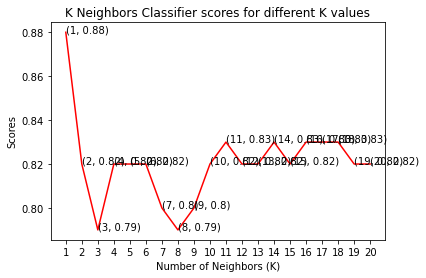

In [123]:
plt.plot([k for k in range(1, 21)], new_knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, new_knn_scores[i-1], (i, new_knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the above plot it is clear that the maximum score achieved is 0.88 for 1 neighbor.

In [133]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(new_knn_scores[10]*100, 10))

The score for K Neighbors Classifier is 83.0% with 10 nieghbors.


In [156]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Decision Tree Classifier 

Here, I am using the decision tree classifier to model the problem
I will vary between a set of max_features and see which returns the best accuracy.

In [130]:
dtree_scores = []
for i in range(1,len(X.columns)+1):
    dtree_classifier = DecisionTreeClassifier(max_features = i,random_state = 0)
    dtree_classifier.fit(X_train,y_train)
    dtree_scores.append(dtree_classifier.score(X_test,y_test))

In [142]:
dtree_scores

[0.8425531914893617,
 0.8595744680851064,
 0.8723404255319149,
 0.8936170212765957,
 0.8851063829787233,
 0.8553191489361702,
 0.8851063829787233,
 0.8553191489361702,
 0.8553191489361702,
 0.8425531914893617,
 0.8723404255319149,
 0.8723404255319149,
 0.8723404255319149,
 0.8978723404255319,
 0.8723404255319149]

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

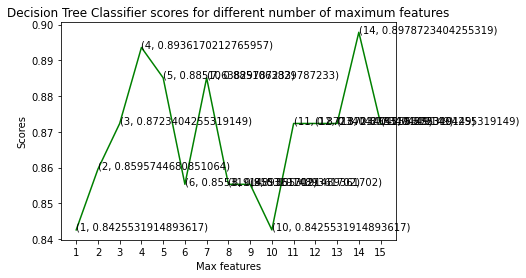

In [137]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dtree_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dtree_scores[i-1], (i, dtree_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [143]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dtree_scores[13]*100, [14]))

The score for Decision Tree Classifier is 89.7872340425532% with [14] maximum features.


In [158]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### Random Forest Classifier

Now, I will use the ensemble method, Random Forest Classifier to create model and vary the number of estimators to see their effect

In [144]:
rf_scores = []
estimators = [10,100,200,500,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

In [151]:
rf_scores

[0.9148936170212766,
 0.9191489361702128,
 0.9276595744680851,
 0.9191489361702128,
 0.9191489361702128]

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

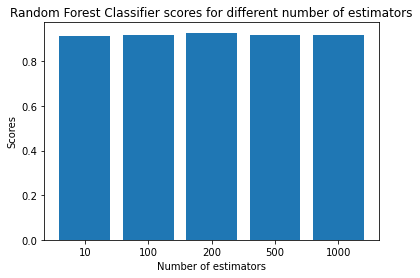

In [150]:
plt.bar([i for i in range(len(estimators))], rf_scores, width = 0.8)

plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

Almost all the values are giving same accuracy butMaximum score is achieved for total estimators 200

In [154]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[2]*100, 200))

The score for Random Forest Classifier is 92.76595744680851% with 200 estimators.


In [159]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Model Evaluation

Here I will define which evauation metrics I will use to evaluate the models. The most important evaluation metrics are Precision, F1 measure, confusion matrix,mathew corr coef

Confusion Matrix

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,mathew_corrcoef
0,Random Forest,0.914894,0.896,0.941176,0.887931,0.918033,0.914554,0.830734


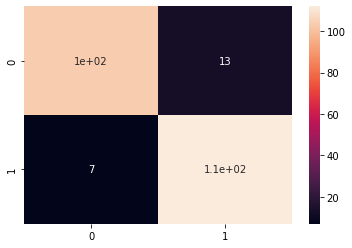

In [172]:
CM = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(CM,annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

mathew = matthews_corrcoef(y_test, y_pred_rf)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','mathew_corrcoef'])

model_results

Comparing all models used

In [173]:
data = {      
                'KNN': y_pred_knn, 
                'Decision Tree': y_pred_decc,
                'Random Forest': y_pred_rf
}

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,mathew_corrcoef
0,Random Forest,0.914894,0.896000,0.941176,0.887931,0.918033,0.914554,0.830734
1,KNN,0.817021,0.801587,0.848739,0.784483,0.824490,0.816611,0.634834
2,Decision Tree,0.872340,0.873950,0.873950,0.870690,0.873950,0.872320,0.744639
3,Random Forest,0.914894,0.896000,0.941176,0.887931,0.918033,0.914554,0.830734
